# Gradient Decent



1.   透過gradient decent 找到loss function的最小值
2.   方法: 更新權重(weight)
3.   Wi = Wi-1 - Learning rate * (損失函數對權重的微分)
4.   更新的過程稱之為back-propagation更新的過程稱之為back propogation
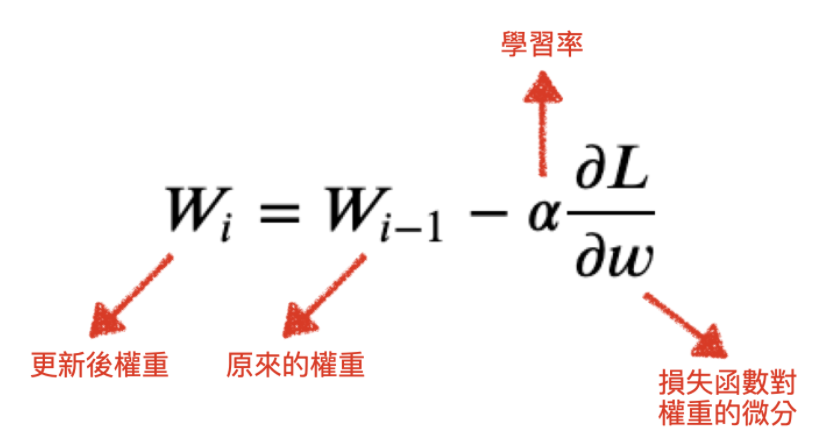


# Computational Graph

## e = (a+b)*(b+1)
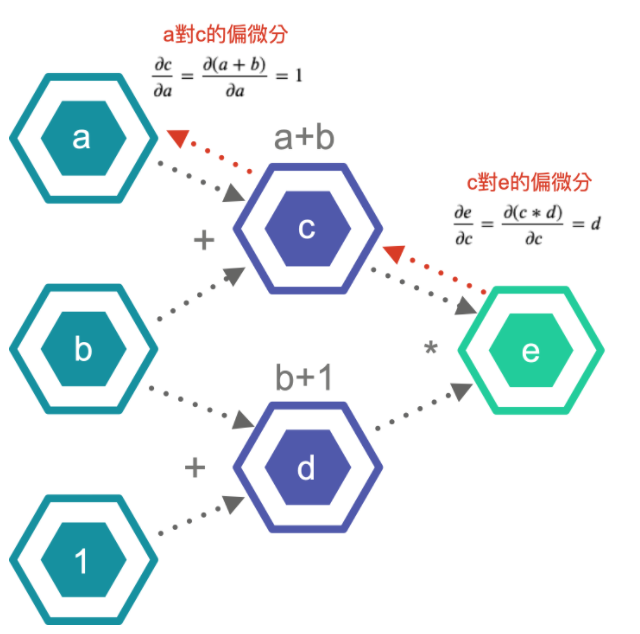


* pytorch即是透過計算圖的方式，使用倒傳遞來計算與更新權重，將局部性微分從一個節點傳遞給另外一個節點的特性，就可以將神經網路中權重對loss function的微分傳由尾端(Loss端) 一路傳遞到頭端(Input端)，而我們所使用的深度學習框架 Pytorch 就在計算圖上。

# Pytorch autograd

1. pytorch在建立tensor的時候可以透過參數 *requires_grad* 決定是否追蹤 
tensor 的微分值
2. 在透過tensor運算中所得到的新的tensor是否會追蹤微分值將會受到被計算的tensor影響
  * Ex. a(requires_grad=true), b(requires_grad=false)
  * => c = a + b, c(requires_grad=true)
3. 為了節省記憶體，可以將 ”.requires_grad” 設置為 False，或使用 ”torch.no_grad”


In [77]:
import torch 
a = torch.rand((2,2),requires_grad=True)
b = torch.rand((2,2),requires_grad=False)
c = a + b
d = c * c
e = torch.mm(c,d)
print(f'a:{a},{a.grad_fn}')
print(f'b:{b},{b.requires_grad}')
print(f'c:{c},{c.requires_grad}')
print(f'd:{d},{d.requires_grad}')
print(f'e:{e},{e.requires_grad}')


# requires_grad 查看是否追蹤 tensor 的微分值
# grad_fn 查看gradient function

a:tensor([[0.1114, 0.2798],
        [0.6354, 0.6545]], requires_grad=True),None
b:tensor([[0.9848, 0.9731],
        [0.1938, 0.7385]]),False
c:tensor([[1.0962, 1.2529],
        [0.8293, 1.3929]], grad_fn=<AddBackward0>),True
d:tensor([[1.2016, 1.5698],
        [0.6877, 1.9402]], grad_fn=<MulBackward0>),True
e:tensor([[2.1788, 4.1518],
        [1.9543, 4.0044]], grad_fn=<MmBackward>),True


In [78]:
# 計算微分的值必須是scaler
# 標量(Scalar，就是一個數字)
out = e.sum()
# 計算微分
out.backward()
# b的requires_grad=False，代表tensor 的微分相關的資訊被記錄，因此b無法透過.grad得到微分值
print(b.grad) 
# a的requires_grad=True，自動進行微分計算
print(a.grad)


None
tensor([[6.9928, 7.4528],
        [7.1597, 9.9988]])
